## **Reproducibility of SHAP DeepExplainer MNIST example**

Goal: reproduce SHAP MNIST classifier example, specially the DeepExplainer function.

 Changing Keras and TensorFlow versions individually or combined does not work. In this version we will try to run a solution from [SHAP Github issue ##1110](https://github.com/slundberg/shap/issues/1110).


In [ ]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

import numpy as np

from __future__ import print_function
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import get_session
tf.compat.v1.disable_v2_behavior()
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# install SHAP 
!pip install shap
import shap

In [ ]:
# model parameters
batch_size = 128
num_classes = 10
epochs = 2 # original: 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

### Note the sigmoid here instead of softmax,
### resulting in slightly lower classifier accuracy ###
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - ETA: 0s - loss: 2.2673 - acc: 0.1591

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


60000/60000 [==============================] - 150s 2ms/sample - loss: 2.2673 - acc: 0.1591 - val_loss: 2.2082 - val_acc: 0.4431
Epoch 2/2
60000/60000 [==============================] - 150s 2ms/sample - loss: 2.1740 - acc: 0.2997 - val_loss: 2.0893 - val_acc: 0.6342
Test loss: 2.089278758621216
Test accuracy: 0.6342


In [ ]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(x_test[1:5])


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.


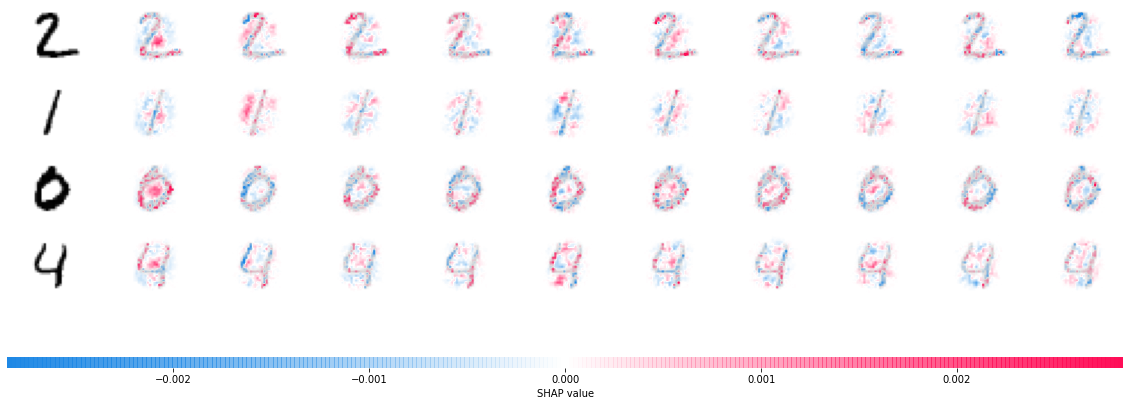

In [ ]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])